In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(color_codes=True)

### 一、绘制单变量分布
在 seaborn 中想要快速查看单变量分布的最方便的方法是使用distplot()函数。默认情况下，该方法将会绘制直方图histogram并拟合[内核密度估计] kernel density estimate (KDE)

d:\soft\_env\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


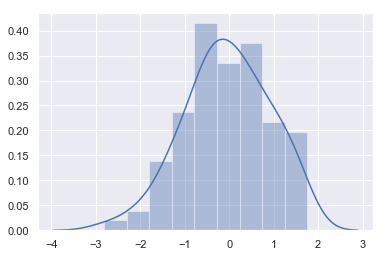

In [5]:
x = np.random.normal(size=100)
sns.distplot(x)

#### 1. displot()  ——直方图
#####  参数rug：垂直刻度 
>直方图首先确定数据区间，然后观察数据落入这些区间中的数量来绘制柱形图以此来表征数据的分布情况。添加一个 rug plot，它在每个观察值上画一个小的垂直刻度。可以使用rugplot() 函数来创建 rugplot 本身，但是也可以在 distplot()中使用

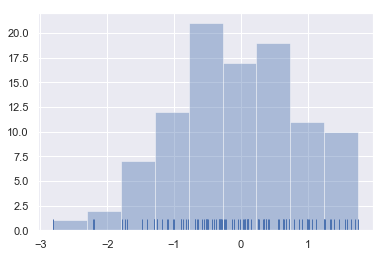

In [6]:
sns.distplot(x, kde=False, rug=True)

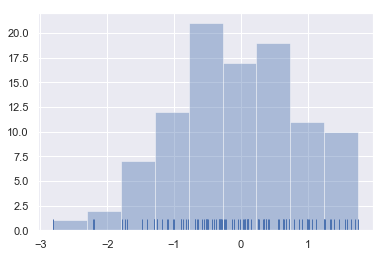

In [15]:
sns.distplot(x, kde=False)
sns.rugplot(x)

#### 2. kde ——核密度估计
#####  参数kde：核密度估计
>直方图默认kde参数是为True

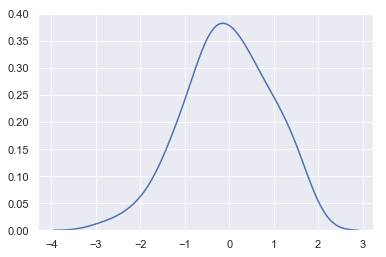

In [11]:
sns.distplot(x, hist=False)

#####  参数shade：使区间显示阴影

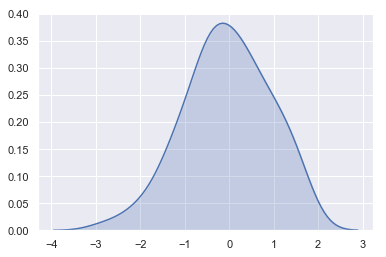

In [12]:
sns.kdeplot(x, shade=True)

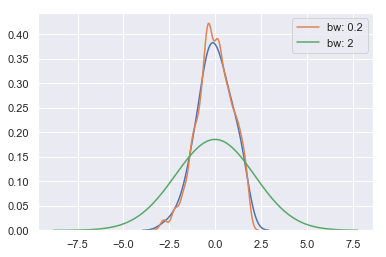

In [13]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

##### 参数cut：

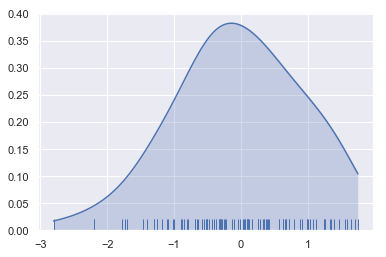

In [14]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x)

#### 3. 拟合参数分布
#####  参数fit：

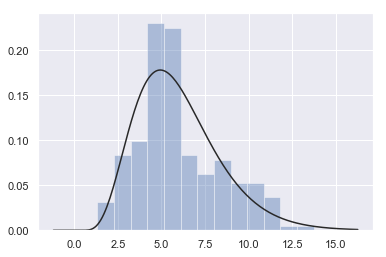

In [16]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)

### 二、绘制二元分布 jointplot()
它对于可视化两个变量的二元分布也很有用。在 seaborn 中，最简单的方法就是使用jointplot()函数，它创建了一个多面板图形，显示了两个变量之间的二元(或联合)关系，以及每个变量在单独轴上的一元(或边际)分布。

In [2]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

#### 1.  散点图
可视化二元分布最常见的方法是散点图。散点图也是 jointplot()函数显示的默认类型的图

d:\soft\_env\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


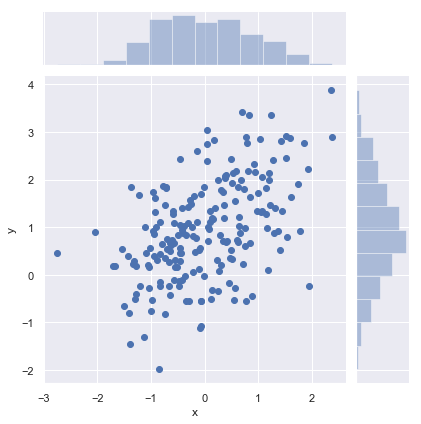

In [3]:
sns.jointplot(x="x", y="y", data=df)

#### 2. 六边形“桶”(Hexbin)图

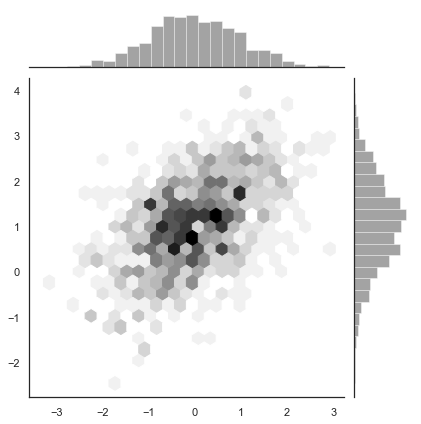

In [4]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")

#### 3. 核密度估计

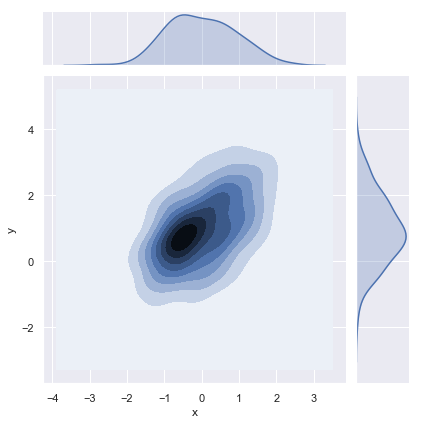

In [5]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

### 三、可视化数据集中的成对关系
在数据集中绘制多个成对的双变量分布，您可以使用pairplot()函数。 这将创建一个轴矩阵并显示 DataFrame 中每对列的关系，默认情况下，它还绘制对角轴上每个变量的单变量分布

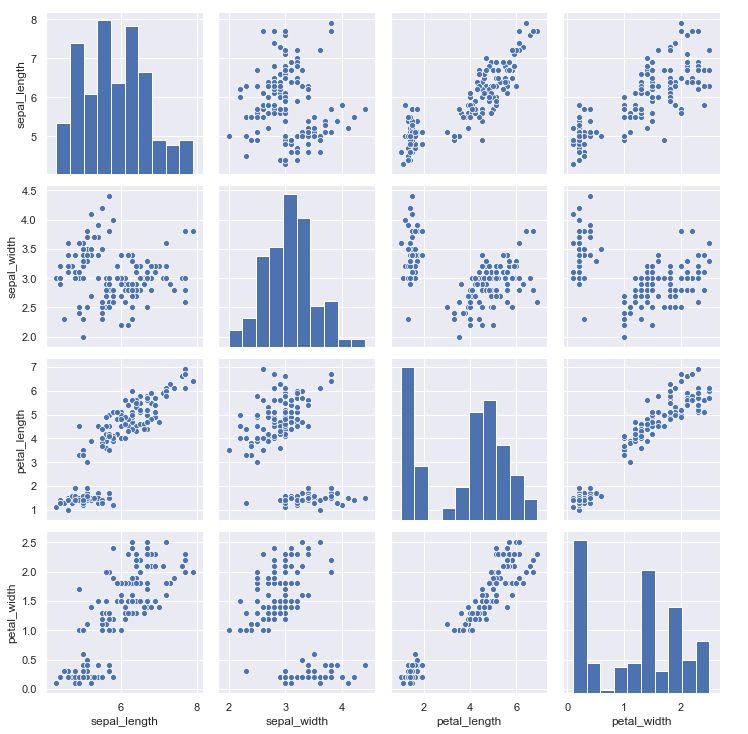

In [7]:
iris = pd.read_csv('seaborn-data/iris.csv')
sns.pairplot(iris)

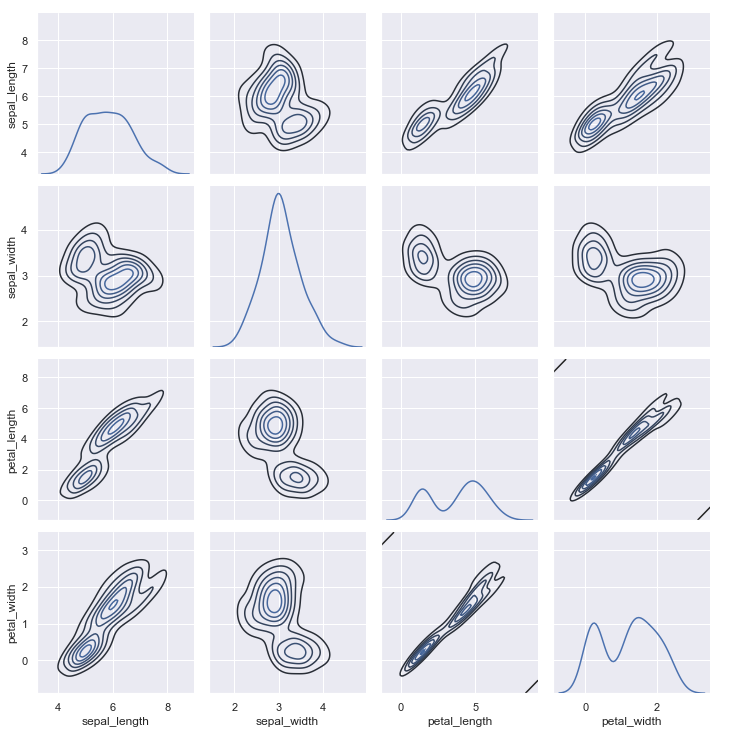

In [8]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)